In [3]:
from pathlib import Path
import pandas as pd
import seaborn as sns
#import vaex as vx
from pyarrow import csv
from datasets import load_dataset

import numpy as np

import matplotlib.pyplot as plt

In [6]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
#%load_ext jupyter_black

In [7]:
list(Path(".").resolve().iterdir())

[PosixPath('/home/sh/w/cursed_paper/plant-image-classification/paper/notebooks/inat_ds_plots/.ipynb_checkpoints'),
 PosixPath('/home/sh/w/cursed_paper/plant-image-classification/paper/notebooks/inat_ds_plots/Untitled.ipynb'),
 PosixPath('/home/sh/w/cursed_paper/plant-image-classification/paper/notebooks/inat_ds_plots/inat_pnet_lorenz.png'),
 PosixPath('/home/sh/w/cursed_paper/plant-image-classification/paper/notebooks/inat_ds_plots/inaturalist-300k.test.csv'),
 PosixPath('/home/sh/w/cursed_paper/plant-image-classification/paper/notebooks/inat_ds_plots/inaturalist-300k.train.csv'),
 PosixPath('/home/sh/w/cursed_paper/plant-image-classification/paper/notebooks/inat_ds_plots/inaturalist-300k.validation.csv'),
 PosixPath('/home/sh/w/cursed_paper/plant-image-classification/paper/notebooks/inat_ds_plots/paper-plots.ipynb'),
 PosixPath('/home/sh/w/cursed_paper/plant-image-classification/paper/notebooks/inat_ds_plots/plantnet-300k.test.csv'),
 PosixPath('/home/sh/w/cursed_paper/plant-image-cla

In [8]:
inat_files = [
    x for x in list(Path(".").resolve().iterdir()) if "inaturalist-" in str(x)
]
pnet_files = [x for x in list(Path(".").resolve().iterdir()) if "plantnet-" in str(x)]

inat_files, pnet_files

([PosixPath('/home/sh/w/cursed_paper/plant-image-classification/paper/notebooks/inat_ds_plots/inaturalist-300k.test.csv'),
  PosixPath('/home/sh/w/cursed_paper/plant-image-classification/paper/notebooks/inat_ds_plots/inaturalist-300k.train.csv'),
  PosixPath('/home/sh/w/cursed_paper/plant-image-classification/paper/notebooks/inat_ds_plots/inaturalist-300k.validation.csv')],
 [PosixPath('/home/sh/w/cursed_paper/plant-image-classification/paper/notebooks/inat_ds_plots/plantnet-300k.test.csv'),
  PosixPath('/home/sh/w/cursed_paper/plant-image-classification/paper/notebooks/inat_ds_plots/plantnet-300k.train.csv'),
  PosixPath('/home/sh/w/cursed_paper/plant-image-classification/paper/notebooks/inat_ds_plots/plantnet-300k.validation.csv')])

In [9]:
# train, validation, test
ditr = pd.read_csv(inat_files[2])
diva = pd.read_csv(inat_files[1])
dite = pd.read_csv(inat_files[0])
d_inat = pd.concat([ditr, diva, dite], ignore_index=True)

dptr = pd.read_csv(pnet_files[2])
dpva = pd.read_csv(pnet_files[1])
dpte = pd.read_csv(pnet_files[0])
d_pnet = pd.concat([dptr, dpva, dpte], ignore_index=True)

# d_inat.head()
ditr

,kingdom,phylum,class,order,family,genus,species,0
0,Plantae,Tracheophyta,Cycadopsida,Cycadales,Zamiaceae,Macrozamia,Macrozamia moorei,6
1,Plantae,Tracheophyta,Liliopsida,Alismatales,Aponogetonaceae,Aponogeton,Aponogeton junceus,2
2,Plantae,Tracheophyta,Liliopsida,Alismatales,Araceae,Anthurium,Anthurium cordatum,1
3,Plantae,Tracheophyta,Liliopsida,Alismatales,Araceae,Anthurium,Anthurium oxybelium,2
4,Plantae,Tracheophyta,Liliopsida,Alismatales,Araceae,Arum,Arum orientale,45
...,...,...,...,...,...,...,...,...
986,Plantae,Tracheophyta,Polypodiopsida,Polypodiales,Pteridaceae,Pityrogramma,Pityrogramma calomelanos,108
987,Plantae,Tracheophyta,Polypodiopsida,Polypodiales,Thelypteridaceae,Amauropelta,Amauropelta knysnaensis,4
988,Plantae,Tracheophyta,Polypodiopsida,Polypodiales,Thelypteridaceae,Amauropelta,Amauropelta sancta,1
989,Plantae,Tracheophyta,Polypodiopsida,Salviniales,Salviniaceae,Azolla,Azolla filiculoides,185


In [10]:
# https://zhiyzuo.github.io/Plot-Lorenz/

# inat - full
# X = ditr["0"]
X = d_inat.groupby("species").sum()["0"]
X = X.sort_values().values


X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]


# plantnet - entire dataset
# Y = dptr["0"]
Y = d_pnet.groupby("label").sum()["0"]
Y = Y.sort_values().values

Y_lorenz = Y.cumsum() / Y.sum()
Y_lorenz = np.insert(Y_lorenz, 0, 0)
Y_lorenz[0], Y_lorenz[-1]

X_x = np.arange(X_lorenz.size) / (X_lorenz.size - 1)
Y_x = np.arange(Y_lorenz.size) / (Y_lorenz.size - 1)

X_lorenz *= 100
Y_lorenz *= 100
X_x *= 100
Y_x *= 100

/tmp/ipykernel_984507/1724429039.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)
/tmp/ipykernel_984507/1724429039.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


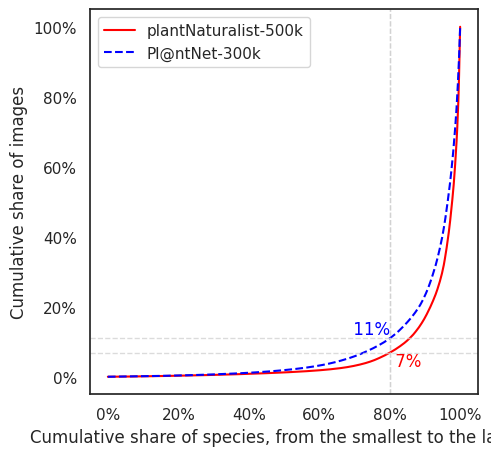

In [13]:
sns.set_context("notebook")

# with sns.axes_style("whitegrid"):
with sns.axes_style("white"):
    # inat
    ax = sns.lineplot(x=X_x, y=X_lorenz, c="red", label="plantNaturalist-500k")
    # plantent
    sns.lineplot(
        x=Y_x, y=Y_lorenz, ax=ax, c="blue", linestyle="--", label="Pl@ntNet-300k"
    )

    ax.figure.set_size_inches(5, 5)
    ax.set_xlabel("Cumulative share of species, from the smallest to the largest")
    ax.set_ylabel("Cumulative share of images")

    # https://stackoverflow.com/questions/65622776/how-to-find-x-value-on-a-intersection-point-of-axhline-on-seaborn-ecdf-plot

    x_special = 80
    for line in ax.get_lines():
        x, y = line.get_data()
        ind = np.argwhere(x >= x_special)[
            0, 0
        ]  # first index where y is larger than y_special
        # x[ind] is the desired x-value
        color = line.get_color()
        ax.text(
            x_special,
            y[ind],
            f" {y[ind]:.0f}%",
            ha="left" if color == "red" else "right",
            va="top" if color == "red" else "bottom",
            color=color,
            fontsize="medium",
        )  # maybe color=line.get_color()
        ax.axvline(x_special, linestyle="--", color="#cfcfcf", lw=1, alpha=0.75)
        ax.axhline(y[ind], linestyle="--", color="#cfcfcf", lw=1, alpha=0.75)

    x_labels = [f"{item:.0f}%" for item in ax.get_xticks().tolist()]
    ax.set_xticklabels(x_labels)
    y_labels = [f"{item:.0f}%" for item in ax.get_yticks().tolist()]
    ax.set_yticklabels(y_labels)

ax.figure.savefig("pnat_pnet_lorenz.png", bbox_inches="tight")

In [8]:
# Num species and pics in inat_300k
print(len(d_inat.groupby("species").sum()))
print(d_inat.groupby("species").sum().sum())

991
0    526584
dtype: int64


In [53]:
# Train, valid, test of our inat dataset
ditr.groupby("species").sum().sum(), diva.groupby("species").sum().sum(), dite.groupby(
    "species"
).sum().sum(),

(0    421294
 dtype: int64,
 0    52726
 dtype: int64,
 0    52564
 dtype: int64)

In [11]:
d_inat

,kingdom,phylum,class,order,family,genus,species,0
0,Plantae,Tracheophyta,Cycadopsida,Cycadales,Zamiaceae,Macrozamia,Macrozamia moorei,60
1,Plantae,Tracheophyta,Liliopsida,Alismatales,Aponogetonaceae,Aponogeton,Aponogeton junceus,48
2,Plantae,Tracheophyta,Liliopsida,Alismatales,Araceae,Anthurium,Anthurium cordatum,1
3,Plantae,Tracheophyta,Liliopsida,Alismatales,Araceae,Anthurium,Anthurium oxybelium,7
4,Plantae,Tracheophyta,Liliopsida,Alismatales,Araceae,Arum,Arum orientale,386
...,...,...,...,...,...,...,...,...
2968,Plantae,Tracheophyta,Polypodiopsida,Polypodiales,Pteridaceae,Pityrogramma,Pityrogramma calomelanos,81
2969,Plantae,Tracheophyta,Polypodiopsida,Polypodiales,Thelypteridaceae,Amauropelta,Amauropelta knysnaensis,5
2970,Plantae,Tracheophyta,Polypodiopsida,Polypodiales,Thelypteridaceae,Amauropelta,Amauropelta sancta,2
2971,Plantae,Tracheophyta,Polypodiopsida,Salviniales,Salviniaceae,Azolla,Azolla filiculoides,172


In [12]:
import plotly.io as pio

pio.renderers.default = (
    "iframe"  # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery
)

import plotly.express as px
import numpy as np

df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(
    df,
    path=["continent", "country"],
    values="pop",
    color="lifeExp",
    hover_data=["iso_alpha"],
    color_continuous_scale="RdBu",
    color_continuous_midpoint=np.average(df["lifeExp"], weights=df["pop"]),
)
fig.show()

In [52]:
pio.renderers.default = (
    "iframe"  # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery
)
df = d_inat
fig = px.sunburst(
    df,
    # path=["kingdom", "phylum", "class", "order"],
    path=["phylum", "class", "order", "family"],
    # path=["phylum", "class", "order", "family", "species"],
    # path=["order", "family", "genus"],
    # path=["order", "family"],
    # path=["phylum", "order", "family"],
    # path=['kingdom','phylum','class','order'],
    values="0",
    color="order",
    # hover_data=["iso_alpha"],
    # color_continuous_scale="RdBu",
    # color_continuous_midpoint=np.average(df["lifeExp"], weights=df["pop"]),
)
fig.show()

In [42]:
!pip install -U kaleido

     |████████████████████████████████| 79.9 MB 3.8 MB/s eta 0:00:01


In [ ]:

libemf

In [13]:
DATA_LOCATION = Path(".").parent / "datasets" / "iNatRG"
DATA_LOCATION_THIN = Path(".").parent / "datasets" / "iNatRG_thin"
DATA_LOCATION_HDF = Path(".").resolve().parent / "datasets" / "hdf"
print(str(DATA_LOCATION_HDF))

DS_LOCATION = DATA_LOCATION / "verbatim.txt"
DS_LOCATION_O = DATA_LOCATION / "occurrence.txt"

DS_LOCATION_H = DATA_LOCATION_HDF / "verbatim.hdf5"
DS_LOCATION_OH = DATA_LOCATION_HDF / "occurrence.hdf5"

/home/sh/Uni/dsp/datasets/hdf


In [14]:
df = vx.open(DS_LOCATION_OH)

In [15]:
tax_col_names_order = [
    "kingdom",
    "phylum",
    "class",
    "order",
    "family",
    "genus",
    "species",
]
libemf
df = df[tax_col_names_order]

In [16]:
inat_counts = df.groupby(tax_col_names_order, agg="count")
inat_counts

#,kingdom,phylum,class,order,family,genus,species,count
0,Plantae,Tracheophyta,Magnoliopsida,Caryophyllales,Phytolaccaceae,Phytolacca,Phytolacca americana,52031
1,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Acanthaceae,Carlowrightia,Carlowrightia torreyana,69
2,Plantae,Bryophyta,Bryopsida,Bryales,Mniaceae,Plagiomnium,Plagiomnium undulatum,3022
3,Plantae,Tracheophyta,Magnoliopsida,Asterales,Campanulaceae,Campanula,Campanula piperi,95
4,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Plantaginaceae,Plantago,Plantago media,8696
...,...,...,...,...,...,...,...,...
"111,551",Plantae,Tracheophyta,Magnoliopsida,Myrtales,Melastomataceae,Miconia,Miconia ostrina,1
"111,552",Plantae,Tracheophyta,Liliopsida,Alismatales,Hydrocharitaceae,Lagarosiphon,Lagarosiphon verticillifolius,1
"111,553",Plantae,Tracheophyta,Liliopsida,Asparagales,Orchidaceae,Pterostylis,Pterostylis platypetala,1
"111,554",Plantae,Tracheophyta,Magnoliopsida,Gentianales,Apocynaceae,Hoya,Hoya erythrina,1


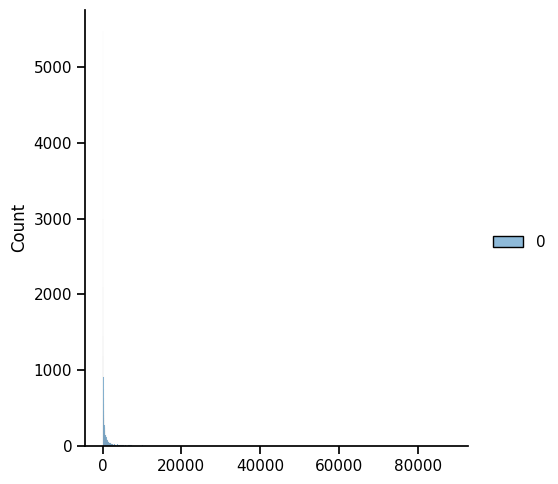

In [17]:
sns.displot(inat_counts[inat_counts["count"] > 50])

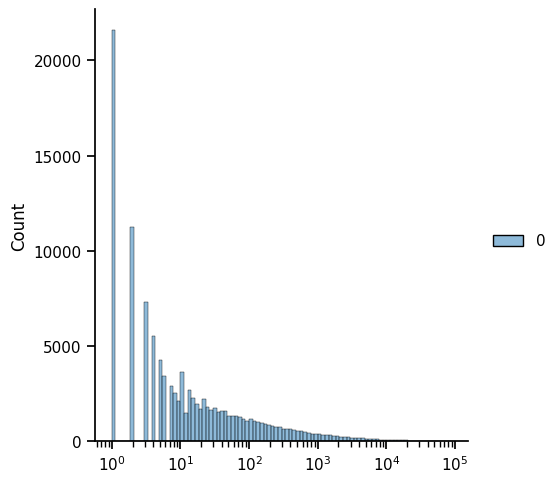

In [18]:
sns.displot(inat_counts[inat_counts["count"] > 0], log_scale=True)

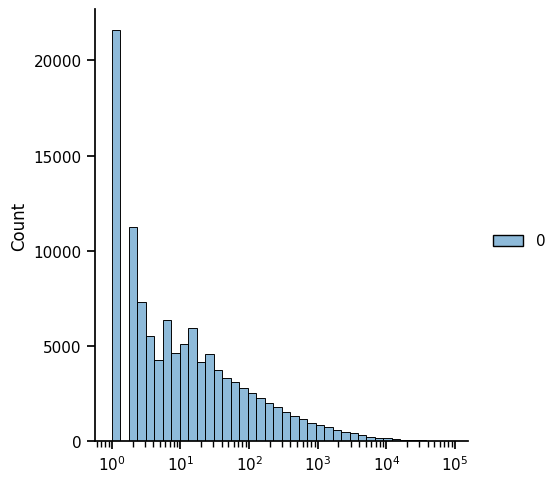

In [19]:
sns.displot(inat_counts[inat_counts["count"] > 0], log_scale=True, bins=40)

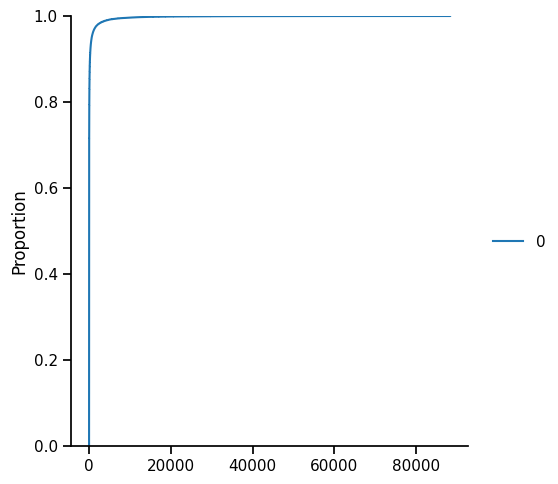

In [20]:
sns.displot(inat_counts[inat_counts["count"] > 0], kind="ecdf")

In [21]:
tax_col_names_order = [
    "kingdom",
    "phylum",
    # "class",
    "order",
    "family",
    "genus",
    "species",
]

In [26]:
import plotly.io as pio

pio.renderers.default = (
    "iframe"  # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery
)

In [27]:
import plotly.express as px
import numpy as np

df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(
    df,
    path=["continent", "country"],
    values="pop",
    color="lifeExp",
    hover_data=["iso_alpha"],
    color_continuous_scale="RdBu",
    color_continuous_midpoint=np.average(df["lifeExp"], weights=df["pop"]),
)
fig.show()

In [28]:
import plotly.express as px
import numpy as np

df = d_inat
fig = px.sunburst(
    df,
    # path=["kingdom", "phylum", "order"],
    # path=["order", "family", "genus"],
    # path=["order", "family"],
    path=["phylum", "order", "family"],
    # path=['kingdom','phylum','class','order'],
    values="0",
    color="order",
    # hover_data=["iso_alpha"],
    # color_continuous_scale="RdBu",
    # color_continuous_midpoint=np.average(df["lifeExp"], weights=df["pop"]),
)
fig.show()

In [29]:
ditr.size, diva.size, dite.size

(7112, 7070, 7077)

In [30]:
df = d_inat
fig = px.sunburst(
    df,
    path=["kingdom", "phylum", "order"],
    # path=["order", "family", "genus"],
    # path=["order", "family"],
    # path=["phylum", "order", "family"],
    # path=['kingdom','phylum','class','order'],
    values="0",
    color="order",
    # hover_data=["iso_alpha"],
    # color_continuous_scale="RdBu",
    # color_continuous_midpoint=np.average(df["lifeExp"], weights=df["pop"]),
)If you are using python3.12, you should use importlib instead of imp module.


fig.show()

In [38]:
d_pnet.label.sort_values()

0              Abeliophyllum distichum Nakai
1081           Abeliophyllum distichum Nakai
2162           Abeliophyllum distichum Nakai
1         Acacia angustissima (Mill.) Kuntze
1082      Acacia angustissima (Mill.) Kuntze
                        ...                 
1079    Zamioculcas zamiifolia (Lodd.) Engl.
2160    Zamioculcas zamiifolia (Lodd.) Engl.
2161               Zannichellia palustris L.
1080               Zannichellia palustris L.
3242               Zannichellia palustris L.
Name: label, Length: 3243, dtype: object

In [37]:
d_inat.species.sort_values()

719     Abelmoschus manihot
2743    Abelmoschus manihot
1732    Abelmoschus manihot
343         Abronia villosa
1356        Abronia villosa
               ...         
2543     Zornia dyctiocarpa
1532     Zornia dyctiocarpa
520      Zornia glochidiata
1533     Zornia glochidiata
2544     Zornia glochidiata
Name: species, Length: 3037, dtype: object